# Proof Of Stake (POS)

In [ ]:
!pip install flask-ngrok

In [ ]:
!ngrok authtoken "2c1xgWZrQzE2OzBdYwaLOjxx83I_6Npz9NQtR33FaSpQamJnY"

/bin/bash: line 1: ngrok: command not found


In [ ]:
import hashlib
import random
import datetime
import time
import json
from collections import OrderedDict

In [ ]:
class Block:
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.nonce = 0
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        return hashlib.sha256((str(self.index) + str(self.timestamp) + str(self.data) + str(self.previous_hash) + str(self.nonce)).encode()).hexdigest()

    def mine_block(self, difficulty):
        while self.hash[:difficulty] != '0' * difficulty:
            self.nonce += 1
            self.hash = self.calculate_hash()
        print("Block mined: " + self.hash)

In [ ]:
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.difficulty = 2  # Set the difficulty level for mining

    def create_genesis_block(self):
        return Block(0, "01/01/2022", "Genesis Block", "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.mine_block(self.difficulty)
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i - 1]
            if current_block.hash != current_block.calculate_hash():
                return False
            if current_block.previous_hash != previous_block.hash:
                return False
        return True

In [ ]:
class Stakeholder:
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance

    def stake(self, blockchain, data):
        if self.balance <= 0:
            print("Insufficient balance to stake.")
            return
        new_block = Block(len(blockchain.chain), str(datetime.datetime.now()), data, blockchain.get_latest_block().hash)
        blockchain.add_block(new_block)
        self.balance -= 1  # Assuming 1 token per block mined
        print(f"{self.name} staked a block with data: {data}")

In [ ]:
# Create a blockchain
blockchain = Blockchain()

# Create stakeholders
stakeholder1 = Stakeholder("Azeem", 10)
stakeholder2 = Stakeholder("Rishabh", 5)

# Stake blocks
stakeholder1.stake(blockchain, "Transaction data 1")
stakeholder2.stake(blockchain, "Transaction data 2")

# Check blockchain validity
print("Is blockchain valid?", blockchain.is_chain_valid())

# Print blockchain
for block in blockchain.chain:
    print("Block Hash:", block.hash)
    print("Previous Hash:", block.previous_hash)
    print("Data:", block.data)
    print("Timestamp:", block.timestamp)
    print("----------------------")


Block mined: 00760c91555f6e78b50971187ae08b48b919058677a4f66b4cc2f5520589121c
Azeem staked a block with data: Transaction data 1
Block mined: 00dba6798c00c4a58a67feb099f8a656318134d2452432ed0c28c15aae82a46f
Rishabh staked a block with data: Transaction data 2
Is blockchain valid? True
Block Hash: f9bdf816d25f9dba2ecc1b35f3a2c509db25a2335beba1e3980da36ad33868a7
Previous Hash: 0
Data: Genesis Block
Timestamp: 01/01/2022
----------------------
Block Hash: 00760c91555f6e78b50971187ae08b48b919058677a4f66b4cc2f5520589121c
Previous Hash: f9bdf816d25f9dba2ecc1b35f3a2c509db25a2335beba1e3980da36ad33868a7
Data: Transaction data 1
Timestamp: 2024-02-07 07:43:47.094529
----------------------
Block Hash: 00dba6798c00c4a58a67feb099f8a656318134d2452432ed0c28c15aae82a46f
Previous Hash: 00760c91555f6e78b50971187ae08b48b919058677a4f66b4cc2f5520589121c
Data: Transaction data 2
Timestamp: 2024-02-07 07:43:47.094866
----------------------


# Proof Of Elapsed Time (POET)

It is used on permissioned blockchain networks to decide the mining rights or the block winners on the network.
Nodes here can run a special instruction that generates a random wait time. This wait time is unique for each node and is proportional to the node's processing power.

In [ ]:
class Block:
    def __init__(self, index, timestamp, data, previous_hash, nonce):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        return hashlib.sha256((str(self.index) + str(self.timestamp) + str(self.data) + str(self.previous_hash) + str(self.nonce)).encode()).hexdigest()

In [ ]:
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.difficulty = 2  # Set the difficulty level for mining

    def create_genesis_block(self):
        return Block(0, "01/01/2022", "Genesis Block", "0", 0)

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        self.chain.append(new_block)

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current_block = self.chain[i]
            previous_block = self.chain[i - 1]
            if current_block.hash != current_block.calculate_hash():
                return False
            if current_block.previous_hash != previous_block.hash:
                return False
        return True

In [ ]:
class PoETNode:
    def __init__(self, name, blockchain):
        self.name = name
        self.blockchain = blockchain

    def generate_wait_time(self):
        # Simulate a random wait time proportional to node's processing power
        wait_time = random.randint(1, 10)  # Random wait time between 1 to 10 seconds
        return wait_time

    def mine_block(self, data):
        wait_time = self.generate_wait_time()
        print(f"{self.name} will wait for {wait_time} seconds before mining.")
        time.sleep(wait_time)
        nonce = random.randint(0, 1000000)
        new_block = Block(len(self.blockchain.chain), str(time.time()), data, self.blockchain.get_latest_block().hash, nonce)
        self.blockchain.add_block(new_block)
        print(f"{self.name} mined a block with data: {data}")

In [ ]:
blockchain = Blockchain()

node1 = PoETNode("Node1", blockchain)
node2 = PoETNode("Node2", blockchain)

node1.mine_block("Transaction data 1")
node2.mine_block("Transaction data 2")

print("Is blockchain valid?", blockchain.is_chain_valid())

for block in blockchain.chain:
    print("Block Hash:", block.hash)
    print("Previous Hash:", block.previous_hash)
    print("Data:", block.data)
    print("Timestamp:", block.timestamp)
    print("----------------------")


Node1 will wait for 7 seconds before mining.
Node1 mined a block with data: Transaction data 1
Node2 will wait for 4 seconds before mining.
Node2 mined a block with data: Transaction data 2
Is blockchain valid? True
Block Hash: f9bdf816d25f9dba2ecc1b35f3a2c509db25a2335beba1e3980da36ad33868a7
Previous Hash: 0
Data: Genesis Block
Timestamp: 01/01/2022
----------------------
Block Hash: 612a65fbdfdf496c66335cee20455401bbb7226b4ee0f5fcfd40965b5480e468
Previous Hash: f9bdf816d25f9dba2ecc1b35f3a2c509db25a2335beba1e3980da36ad33868a7
Data: Transaction data 1
Timestamp: 1707292467.3841782
----------------------
Block Hash: 601eff6e443009ea1b1e8001c027cf9f56cd66a1ecb02d209b76e33a9b1644b7
Previous Hash: 612a65fbdfdf496c66335cee20455401bbb7226b4ee0f5fcfd40965b5480e468
Data: Transaction data 2
Timestamp: 1707292471.3885844
----------------------


#

# Practical Byzantine Fault Tolerance(PBFT)
Used to reach consensus(agreement on the same value) even when some of the nodes in the network fail to respond or respond with incorrect information.

## Referred Github:
https://github.com/hyperledger-labs/bdls/tree/main

## Referred Paper:
https://dl.acm.org/doi/10.1145/3538227


In [18]:
!apt-get install -y golang-go

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  golang-1.18-go golang-1.18-src golang-src
Suggested packages:
  bzr | brz mercurial subversion
The following NEW packages will be installed:
  golang-1.18-go golang-1.18-src golang-go golang-src
0 upgraded, 4 newly installed, 0 to remove and 32 not upgraded.
Need to get 82.3 MB of archives.
After this operation, 436 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 golang-1.18-src all 1.18.1-1ubuntu1.1 [16.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 golang-1.18-go amd64 1.18.1-1ubuntu1.1 [66.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 golang-src all 2:1.18~0ubuntu2 [4,438 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 golang-go amd64 2:1.18~0ubuntu2 [41.8 kB]
Fetched 82.3 MB in 2s (42.7 MB/s)
Selecting previously unselected pa

In [19]:
!go version

go version go1.18.1 linux/amd64


In [1]:
!git clone https://github.com/hyperledger-labs/bdls.git

Cloning into 'bdls'...
remote: Enumerating objects: 433, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 433 (delta 33), reused 52 (delta 22), pack-reused 356
Receiving objects: 100% (433/433), 11.78 MiB | 24.27 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [9]:
%cd bdls

/content/bdls


In [11]:
!cd cmd/emucon/

In [21]:
!pwd

/content/bdls/cmd/emucon


In [16]:
%cd cmd/emucon/

/content/bdls/cmd/emucon


In [20]:
!go build .

In [22]:
! ./emucon run --help

NAME:
   emucon run - start a consensus agent

USAGE:
   emucon run [command options] [arguments...]

OPTIONS:
   --listen value  the client's listening port (default: ":4680")
   --id value      the node id, will use the n-th private key in quorum.json (default: 0)
   --config value  the shared quorum config file (default: "./quorum.json")
   --peers value   all peers's ip:port list to connect, as a json array (default: "./peers.json")
   --help, -h      show help (default: false)
   


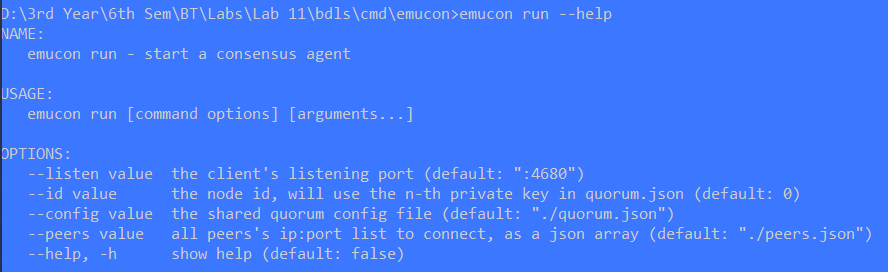

In [23]:
! ./emucon run --id 0 --listen ":4680"

2024/02/10 19:30:12 identity: 0
2024/02/10 19:30:12 listening on: :4680
2024/02/10 19:30:12 connected to peer: 127.0.0.1:4680
2024/02/10 19:30:12 peer connected from: 127.0.0.1:47598
^C


![picture](https://drive.google.com/uc?export=view&id=1bZPUxAnM8enpXa-3skQh9gNIW6j8lG1s)

In [ ]:
! ./emucon run --id 1 --listen ":4681"

![picture](https://drive.google.com/uc?export=view&id=1DjZ7FmRKVf6Soh9i8rTQa8nuESgxT8a9)

In [ ]:
! ./emucon run --id 2 --listen ":4682"

![picture](https://drive.google.com/uc?export=view&id=1L3reqmwRBNufEQ2-hYBdu7qV1Bodr-Xh)

In [ ]:
! ./emucon run --id 3 --listen ":4683"

![picture](https://drive.google.com/uc?export=view&id=1nN-8r9ERkIinAyXD8M2INPOXRa8IpXAU)

# Proof Of Authority (POA)
It relies on the validator's reputation to make the blockchain network work properly. Here a fixed set of validators (authorities) are responsible for validating and minting new blocks.

In [ ]:
class Block:
    def __init__(self, index, timestamp, transactions, previous_hash, nonce=0):
        self.index = index
        self.timestamp = timestamp
        self.transactions = transactions
        self.previous_hash = previous_hash
        self.nonce = nonce
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        block_string = json.dumps({"index": self.index,
                                   "timestamp": self.timestamp,
                                   "transactions": self.transactions,
                                   "previous_hash": self.previous_hash,
                                   "nonce": self.nonce}, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

In [ ]:
class Blockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.authorities = {}
        self.pending_transactions = []
        self.difficulty = 2

    def create_genesis_block(self):
        return Block(0, "01/01/2022", [], "0")

    def get_latest_block(self):
        return self.chain[-1]

    def add_block(self, new_block):
        new_block.previous_hash = self.get_latest_block().hash
        new_block.nonce = self.proof_of_work(new_block)
        self.chain.append(new_block)

    def add_authority(self, authority_name, authority_info):
        self.authorities[authority_name] = authority_info

    def create_transaction(self, sender, recipient, amount):
        self.pending_transactions.append({"sender": sender, "recipient": recipient, "amount": amount})

    def mine_pending_transactions(self, miner):
        block = Block(len(self.chain), str(time.time()), self.pending_transactions, self.get_latest_block().hash)
        self.add_block(block)
        self.pending_transactions = []
        print(f"Block mined by {miner}: {block.hash}")

    def proof_of_work(self, block):
        nonce = 0
        computed_hash = block.calculate_hash()
        while not computed_hash.startswith('0' * self.difficulty):
            nonce += 1
            block.nonce = nonce
            computed_hash = block.calculate_hash()
        return nonce

In [ ]:
blockchain = Blockchain()

# Add authorities
blockchain.add_authority("Authority1", {"name": "Authority1", "public_key": "abc123"})
blockchain.add_authority("Authority2", {"name": "Authority2", "public_key": "def456"})

# Create transactions
blockchain.create_transaction("Azeem", "Rishabh", 5)
blockchain.create_transaction("Rishabh", "Azeem", 3)

# Mine pending transactions
blockchain.mine_pending_transactions("Authority1")
blockchain.mine_pending_transactions("Authority2")

# Print blockchain
for block in blockchain.chain:
    print("Block Hash:", block.hash)
    print("Previous Hash:", block.previous_hash)
    print("Data:", block.transactions)
    print("Timestamp:", block.timestamp)
    print("Validators/Authorities:", blockchain.authorities)
    print("----------------------")

Block mined by Authority1: 9a205fa9704b8631d1a8678d70e2e703a52bb2536c032bb25be2ec2f9dda27f3
Block mined by Authority2: 8bf33a008ccfbc95483ba3b0546038c00c7b11b8a69e85a373bd19391a2d22d0
Block Hash: 1eb3b8388d0f3e5281454562abe4c2de04bc24e6c0b8644130a6157fa2346286
Previous Hash: 0
Data: []
Timestamp: 01/01/2022
Validators/Authorities: {'Authority1': {'name': 'Authority1', 'public_key': 'abc123'}, 'Authority2': {'name': 'Authority2', 'public_key': 'def456'}}
----------------------
Block Hash: 9a205fa9704b8631d1a8678d70e2e703a52bb2536c032bb25be2ec2f9dda27f3
Previous Hash: 1eb3b8388d0f3e5281454562abe4c2de04bc24e6c0b8644130a6157fa2346286
Data: [{'sender': 'Azeem', 'recipient': 'Rishabh', 'amount': 5}, {'sender': 'Rishabh', 'recipient': 'Azeem', 'amount': 3}]
Timestamp: 1707293474.683188
Validators/Authorities: {'Authority1': {'name': 'Authority1', 'public_key': 'abc123'}, 'Authority2': {'name': 'Authority2', 'public_key': 'def456'}}
----------------------
Block Hash: 8bf33a008ccfbc95483ba3b054

# Conclusion

In conclusion, through the implementation of Proof of Authority (PoA), Proof of Stake (PoS), Practical Byzantine Fault Tolerance (pBFT), and Proof of Elapsed Time (PoET) consensus mechanisms, we have explored a diverse range of approaches to achieve consensus in blockchain networks